In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

minute_aggregated/capture20110812_ahead.aggregated.csv
Accuracy: 0.7877, Recall: 0.7530, Precision: 0.7877, f1_score: 0.7684 



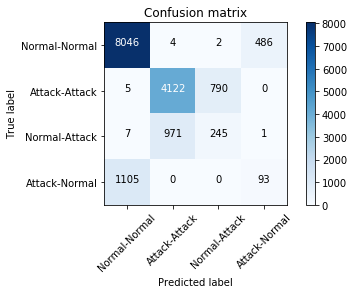

minute_aggregated/capture20110819_ahead.aggregated.csv
Accuracy: 0.6706, Recall: 0.6498, Precision: 0.6706, f1_score: 0.6577 



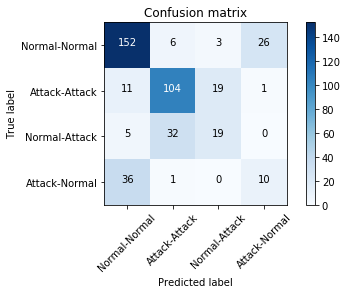

minute_aggregated/capture20110816_ahead.aggregated.csv
Accuracy: 0.6129, Recall: 0.6094, Precision: 0.6129, f1_score: 0.6090 



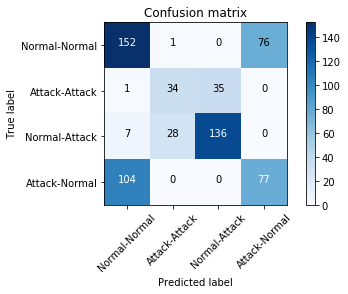

minute_aggregated/capture20110810_ahead.aggregated.csv
Accuracy: 0.7245, Recall: 0.6964, Precision: 0.7245, f1_score: 0.7080 



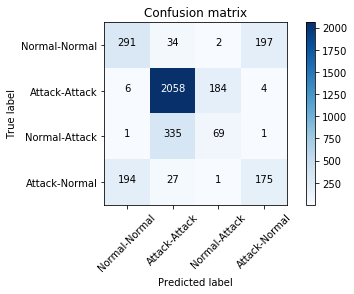

minute_aggregated/capture20110815-2_ahead.aggregated.csv
Accuracy: 0.6246, Recall: 0.6048, Precision: 0.6246, f1_score: 0.6113 



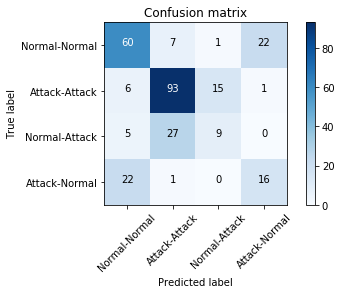

minute_aggregated/capture20110817_ahead.aggregated.csv
Accuracy: 0.9596, Recall: 0.9535, Precision: 0.9596, f1_score: 0.9556 



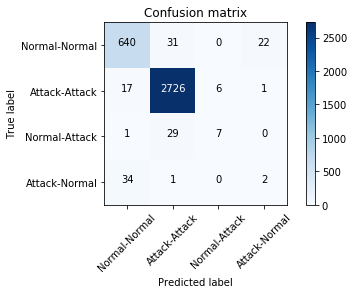

minute_aggregated/capture20110818_ahead.aggregated.csv
Accuracy: 0.9276, Recall: 0.9133, Precision: 0.9276, f1_score: 0.9194 



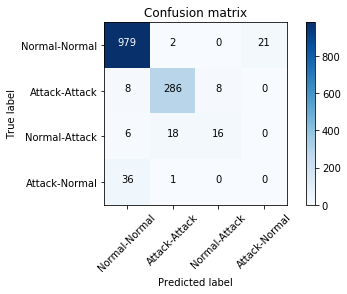

minute_aggregated/capture20110818-2_ahead.aggregated.csv
Accuracy: 0.9141, Recall: 0.8704, Precision: 0.9141, f1_score: 0.8917 



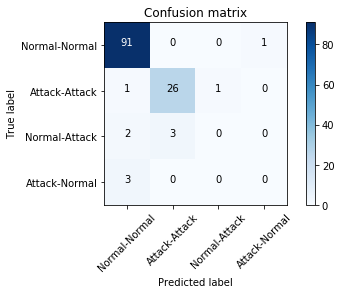

minute_aggregated/capture20110811_ahead.aggregated.csv
Accuracy: 0.7124, Recall: 0.6902, Precision: 0.7124, f1_score: 0.6979 



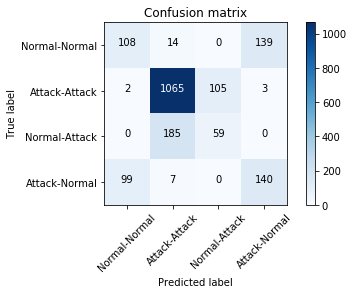

minute_aggregated/capture20110816-3_ahead.aggregated.csv
Accuracy: 0.7838, Recall: 0.7611, Precision: 0.7838, f1_score: 0.7714 



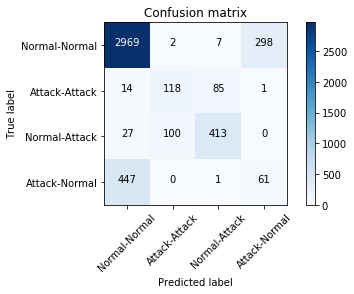

minute_aggregated/capture20110815-3_ahead.aggregated.csv
Accuracy: 0.8042, Recall: 0.7522, Precision: 0.8042, f1_score: 0.7731 



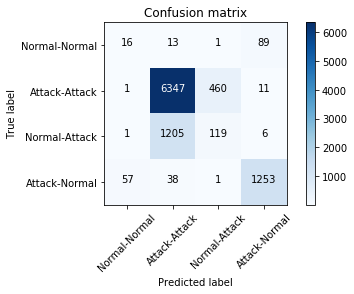

minute_aggregated/capture20110816-2_ahead.aggregated.csv
Accuracy: 0.8444, Recall: 0.8186, Precision: 0.8444, f1_score: 0.8310 



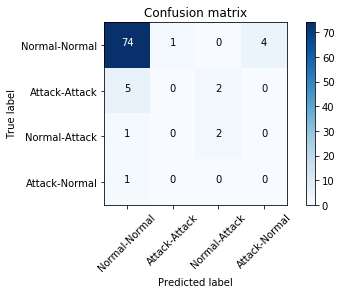

minute_aggregated/capture20110815_ahead.aggregated.csv
Accuracy: 0.7942, Recall: 0.7731, Precision: 0.7942, f1_score: 0.7800 



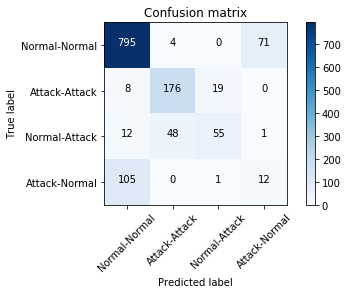

In [11]:
# Detecting window ahead with normal on one second intervals
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict, test_dict, get_ahead_feature_labels
from summarizer import Summarizer
from plot_features import plot_confusion_matrix
import os

binet_files = os.listdir('binetflows')
files = ['minute_aggregated/{}_ahead.aggregated.csv'.format(name) for name in [binet.split('/')[-1].split('.')[0] for binet in binet_files]]

for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_ahead_feature_labels(f, Summarizer().features)
    clf = rf_train(xtrain, ytrain, use_ahead=True)
    results = test_dict(clf, xtest, ytest, use_ahead=True)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal-Normal', 'Attack-Attack', 'Normal-Attack', 'Attack-Normal'])